# 構造方程式

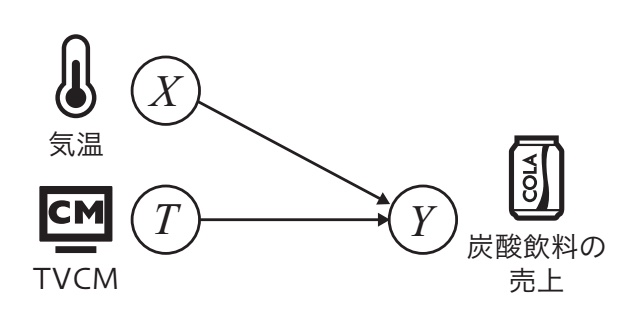

$$
    Y = f(X,T,\epsilon	)
$$

- $f$：任意の関数
- $Y$：結果変数
- $X$：共変量
- $T$：処置変数
- $\epsilon$：誤差項

このような等式を用いて変数間の関係を分析する手法を構造方程式モデリング、もしくは共分散構造分析という。

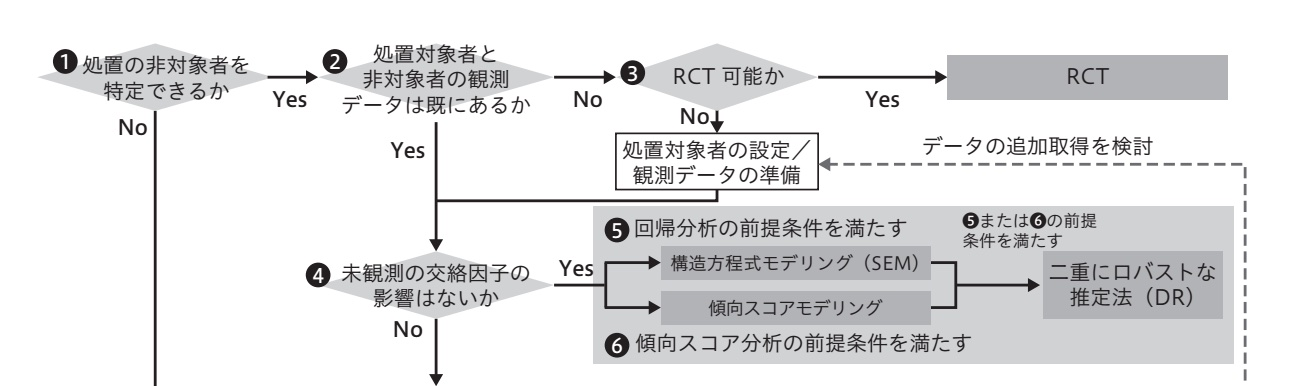

今回のケースでは、

- DAGが上記で正しく記述できているとすると、未観測の交絡因子が存在しないので構造方程式モデリングが可能となる。

以下の問に答えるために構造方程式モデリングを実施します。

## 問：炭酸飲料の売り上げに影響を与える因子は何か？また、その因子がどの程度影響を与えるか？

- Step1：データの確認
- Step2：DAGの識別
- Step3：識別仮定の確認
- Step4：因果効果の推定
- Step5：結果の評価

### Step1：データの確認

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import pandas as pd
import numpy as np
import semopy as sem

np.random.seed(0)

N = 200

# TV_CMのデータを生成
TV_CM = np.random.normal(50, 10, N)

# 気温のデータ生成
Temperature_C = np.random.uniform(10, 35, N)

# ノイズ
Noise = np.random.normal(0, 5, N)

# 炭酸飲料の売り上げ（百万円）
Soda_Sales = 10 + 0.5 * TV_CM + 2.0 * Temperature_C + Noise

data = pd.DataFrame(
    {
        'TV_CM': TV_CM,
        'Temperature_C': Temperature_C,
        'Soda_Sales': Soda_Sales
    }
)

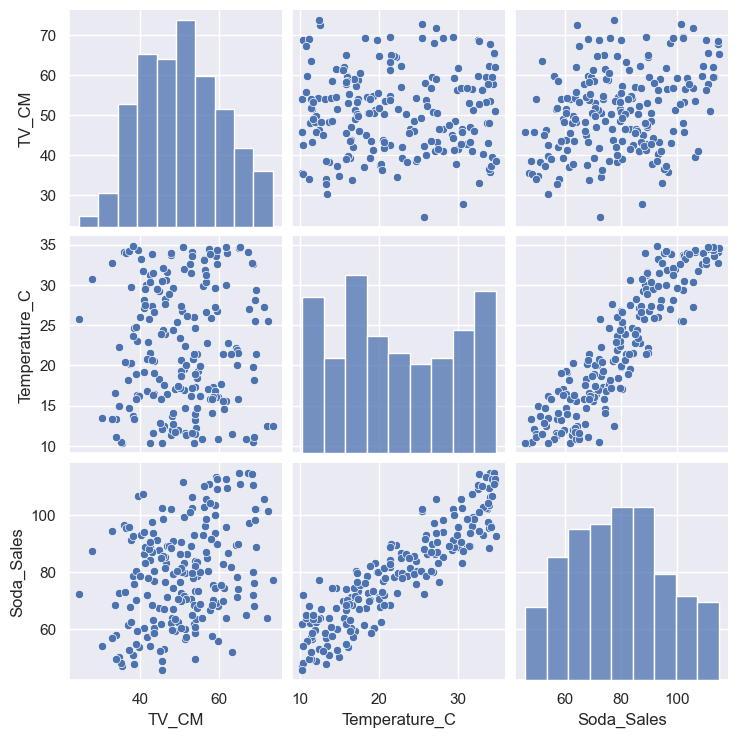

In [3]:
sns.pairplot(data)
plt.show()

## Step2：DAGの確認

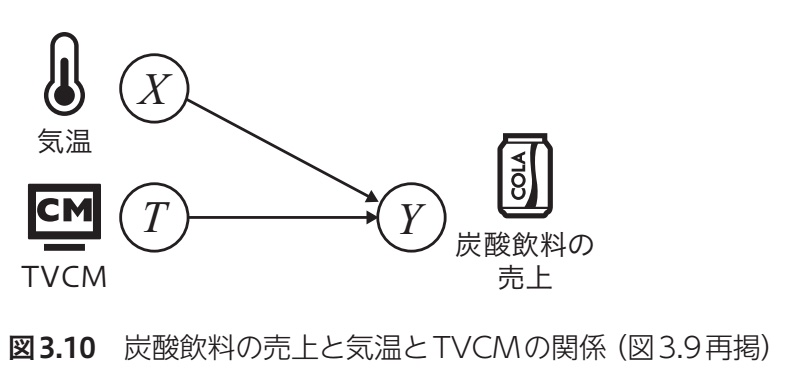

## Step3：識別仮定の確認
識別仮定（条件付き独立性、SUTVAなど）を満たしていることを確認します。
構造をコードで記述します。  
本問に関しては、識別仮定を満たしているものとします。

In [4]:
model_desc = """
# 回帰分析
Soda_Sales ~ TV_CM + Temperature_C
"""

~をオペレータといい、下記の3つのオペレータが使用可能です。
- ~：構造方程式
- =~：測定方程式
- ~~：共変関係

## Step4：因果効果の推定

線形重回帰に基づくSEMを実行するには以下を全て満たす必要があります。
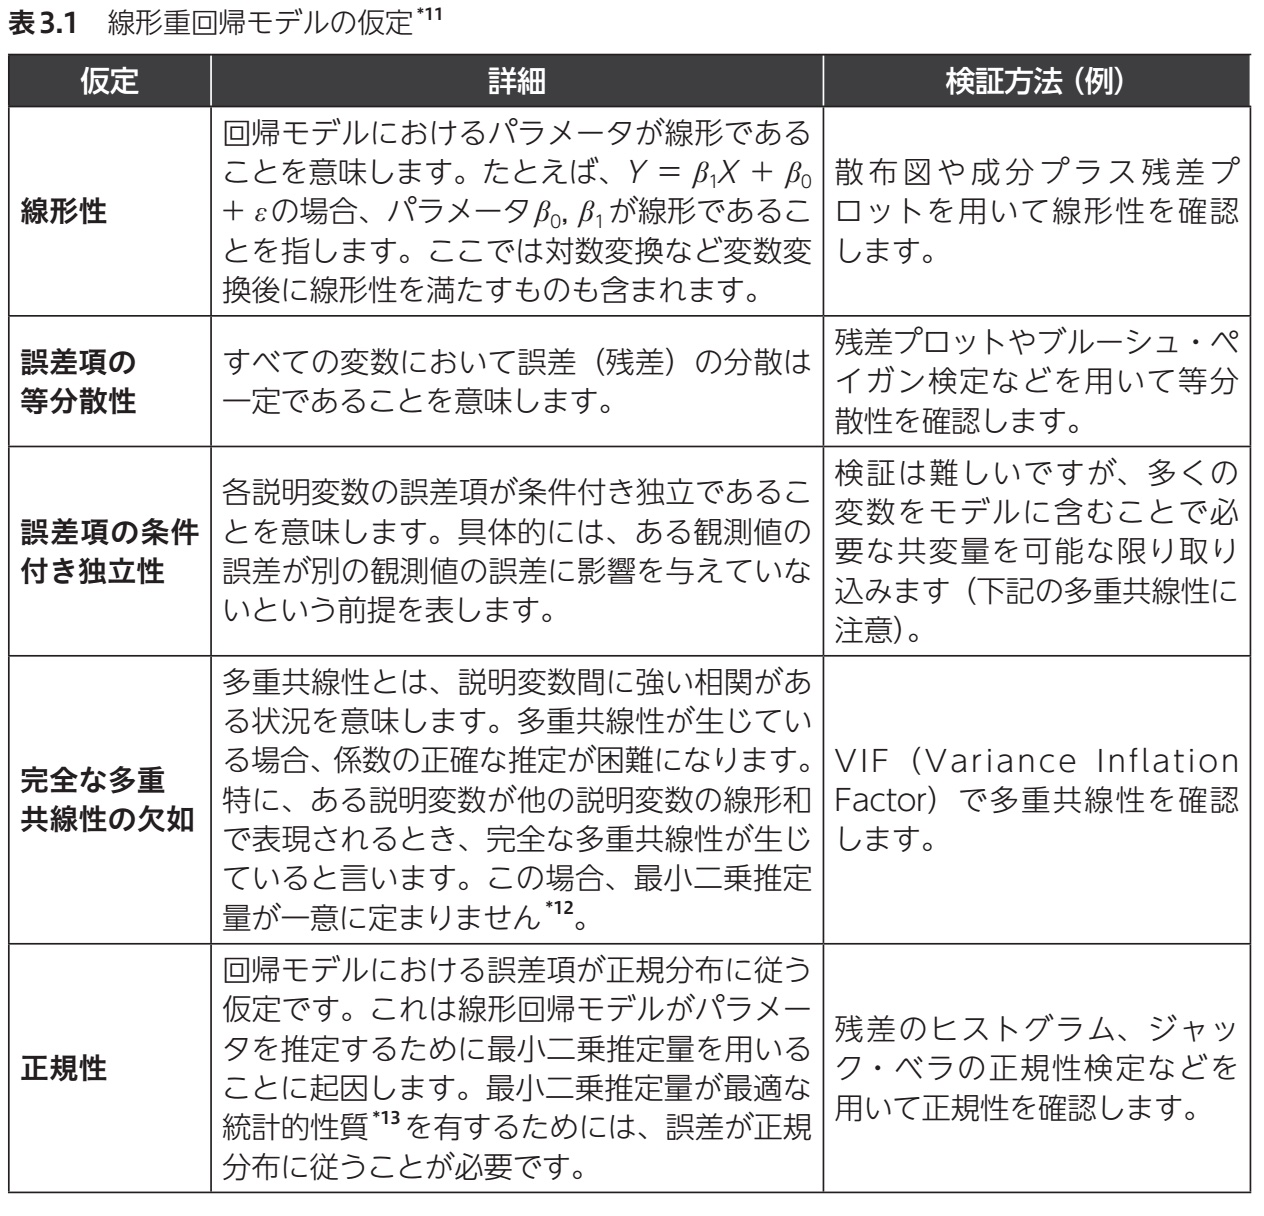

次に因果効果を推定するためのモデルを構築します。

In [5]:
mod = sem.Model(model_desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 12
Params: 0.513 2.043 26.145


## Step5：結果の評価

In [6]:
stats = sem.calc_stats(mod)
print(stats.T)

                      Value
DoF            3.000000e+00
DoF Baseline   5.000000e+00
chi2           1.050434e-04
chi2 p-value   9.999997e-01
chi2 Baseline  4.891441e+02
CFI            1.006196e+00
GFI            9.999998e-01
AGFI           9.999996e-01
NFI            9.999998e-01
TLI            1.010327e+00
RMSEA          0.000000e+00
AIC            5.999999e+00
BIC            1.589495e+01
LogLik         5.252169e-07


GFI（決定係数）が0.9以上、RMSEAが0.05以下となっており、比較的当てはまりの良いモデルが構築できています。  
次にモデルを構築した結果を見ていきます。

In [7]:
ins = mod.inspect()
print(ins)

         lval  op           rval   Estimate  Std. Err    z-value  p-value
0  Soda_Sales   ~          TV_CM   0.513118  0.035408  14.491412      0.0
1  Soda_Sales   ~  Temperature_C   2.043452  0.047345  43.160776      0.0
2  Soda_Sales  ~~     Soda_Sales  26.145319  2.614532  10.000000      0.0


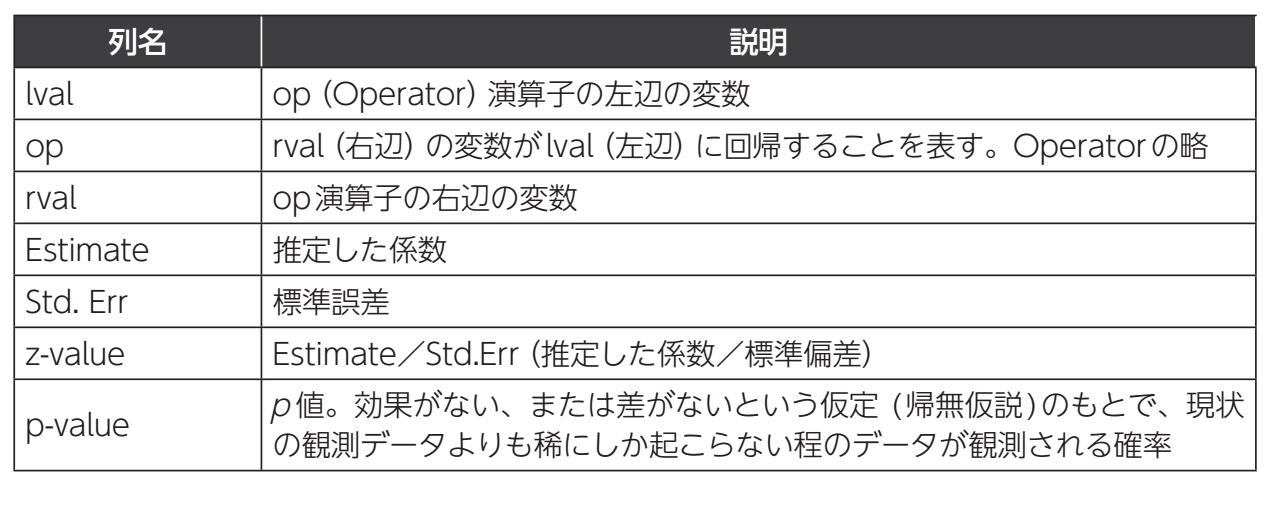

- TV_CMの影響
  - Estimateの結果が0.513になっています。これはTCVMの視聴関心度が1増加したら炭酸飲料の売り上げが0.513（百万円）増加することになります。この係数は平均処置効果（ATE）を意味します。
  - p値が0であり、これは有意であることを意味します。
- Temperature_Cの影響
  - Estimateの結果が2.043452になっています。これは気温が1度上がったら炭酸飲料の売り上げが2.043452（百万円）増加することになります。
 
最後に結果を視覚的に捉えるために可視化します。

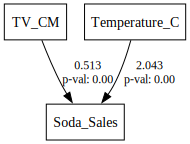

In [8]:
sem.semplot(mod, 'sem_result.png')

## 構造方程式モデリングの課題

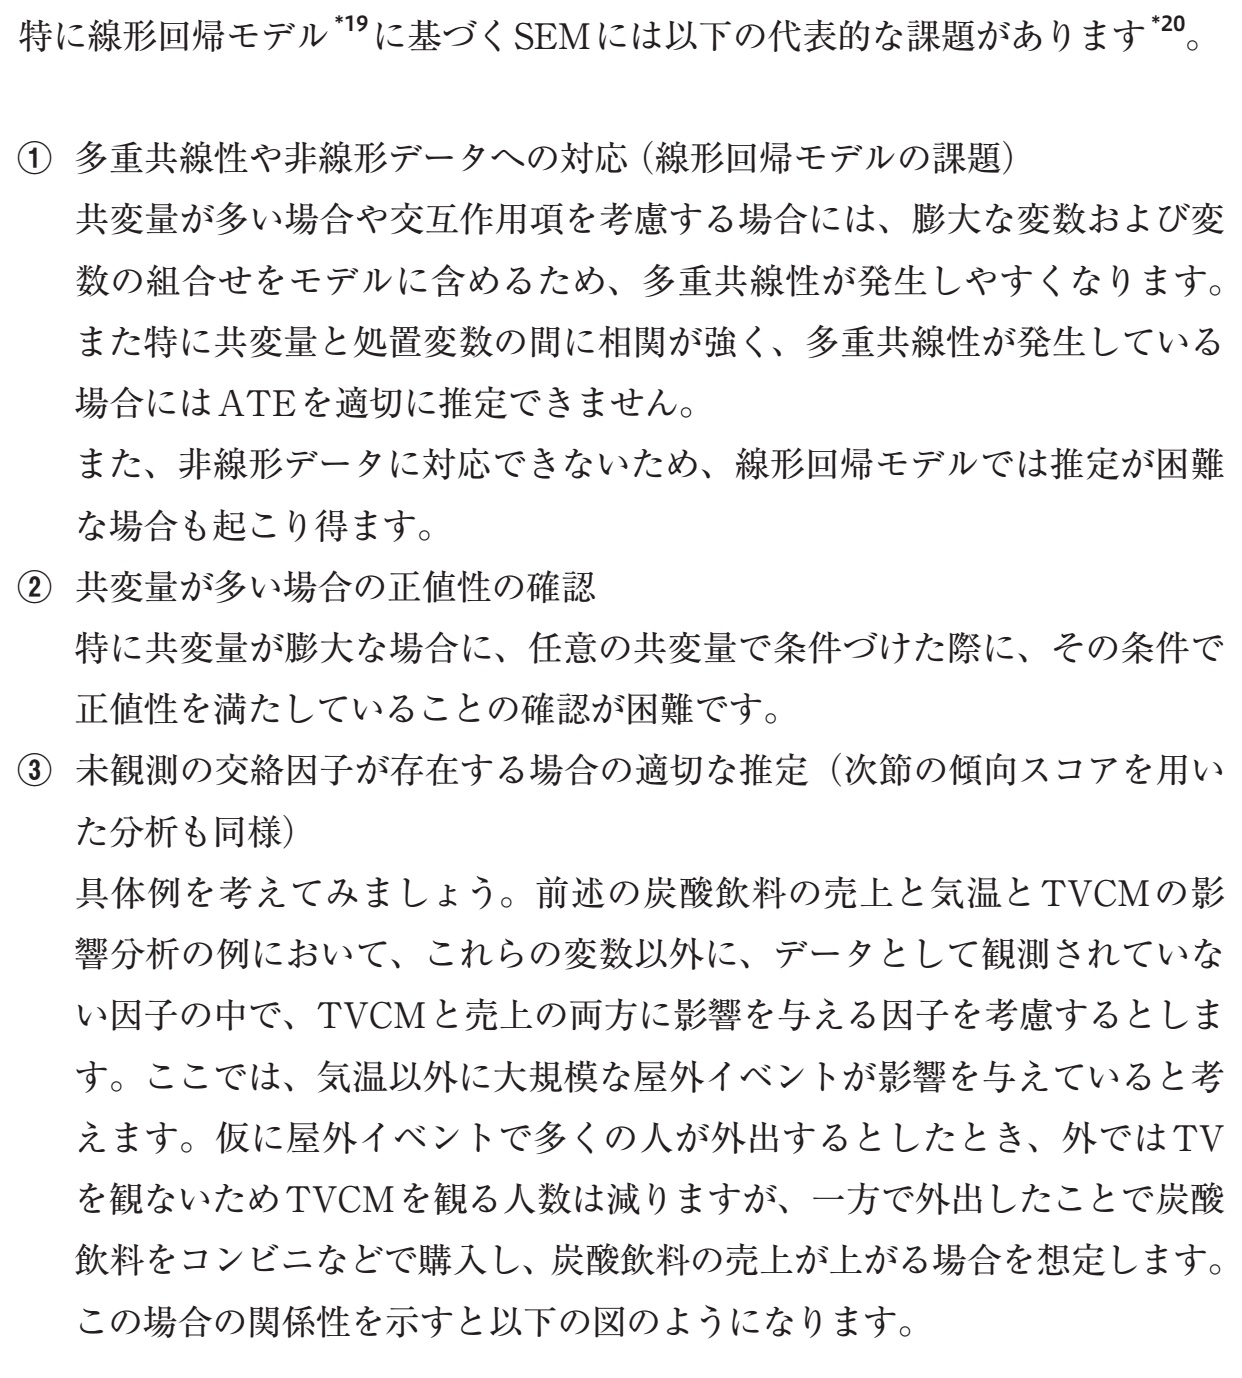
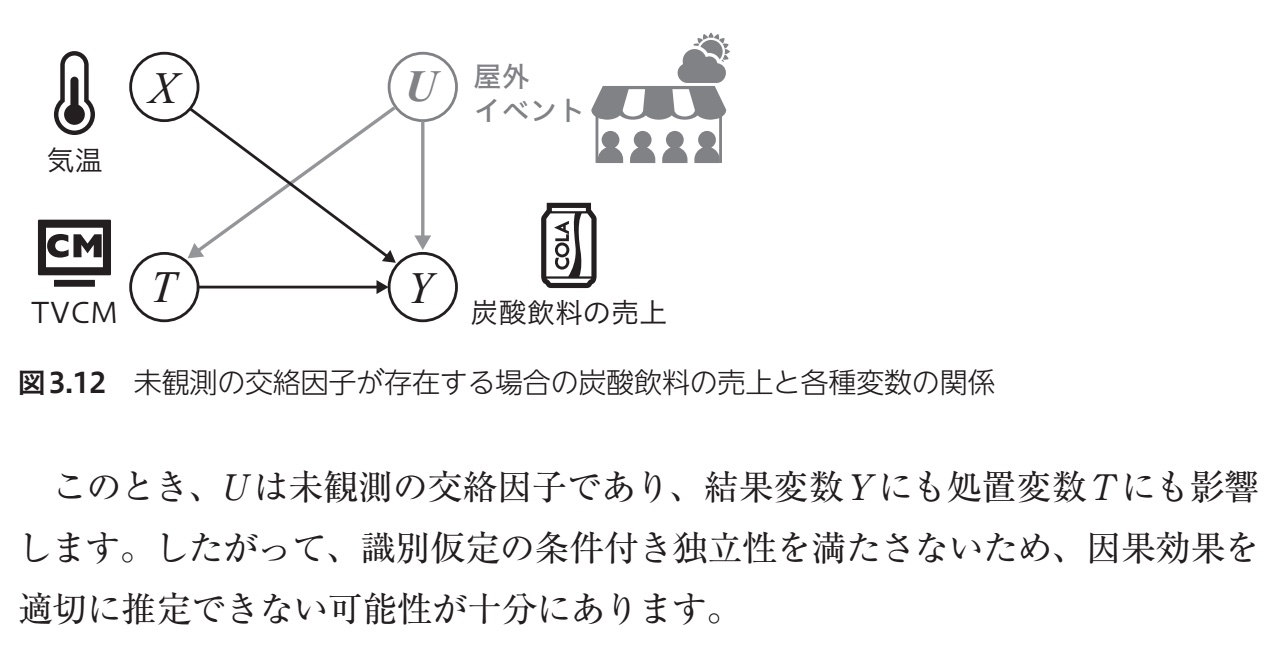